Let's Analyaze Breast Cancer Data

Libraris :

In [1]:
#Essentials :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
#preprocessing :
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import KFold
#build models :
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
#accuracy:
from sklearn.metrics import accuracy_score

Take a look of dataset :

In [2]:
df = pd.DataFrame(pd.read_csv('Breast_Cancer_METABRIC.csv'))
df.shape

(2509, 34)

In [3]:
df.head(3)

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease


In [4]:
df=df.dropna()
df

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
5,MB-0010,78.77,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,...,Deceased,Positive,Yes,2.89,Recurred,Female,ER+/HER2- High Prolif,31.0,4.0,Died of Disease
10,MB-0028,86.41,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,...,Deceased,Negative,Yes,36.09,Not Recurred,Female,ER+/HER2- High Prolif,16.0,2.0,Died of Other Causes
11,MB-0035,84.22,Mastectomy,Breast Cancer,Breast Invasive Lobular Carcinoma,High,No,Her2,1.0,Negative,...,Deceased,Negative,No,35.79,Recurred,Female,ER+/HER2- High Prolif,28.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,MB-6232,71.22,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,No,LumA,5.0,Positve,...,Deceased,Positive,No,83.88,Not Recurred,Female,ER+/HER2- Low Prolif,30.0,2.0,Died of Other Causes
1698,MB-6233,70.65,Breast Conserving,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,No,LumB,5.0,Positve,...,Living,Positive,Yes,198.52,Not Recurred,Female,ER+/HER2- Low Prolif,20.0,1.0,Living
1700,MB-6237,75.62,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,Basal,5.0,Negative,...,Deceased,Negative,No,103.82,Not Recurred,Female,ER-/HER2-,20.0,1.0,Died of Other Causes
1702,MB-6239,52.84,Breast Conserving,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,Normal,5.0,Positve,...,Living,Positive,Yes,197.70,Not Recurred,Female,ER+/HER2- High Prolif,20.0,2.0,Living


In [5]:
df.columns

Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')

In [6]:
df.columns= ['PatientID', 'AgeDiagnosis', 'TypeBreastSurgery',
       'CancerType', 'CancerTypeDetailed', 'Cellularity', 'Chemotherapy',
       'Pam50+Claudin_lowSubtype', 'Cohort', 'ERStatusMeasuredIHC',
       'ER_Status', 'NeoplasmHistologicGrade',
       'HER2_StatusMeasured_SNP6', 'HER2_Status',
       'TumorOtherHistologicSubtype', 'HormoneTherapy',
       'InferredMenopausalState', 'IntegrativeCluster',
       'PrimaryTumorLaterality', 'LymphNodesExaminedPositive',
       'MutationCount', 'NottinghamPrognosticIndex', 'OncotreeCode',
       'OverallSurvival(Months)', 'OverallSurvivalStatus', 'PR_Status',
       'RadioTherapy', 'RelapseFreeStatus(Months)', 'RelapseFreeStatus',
       'Sex', '3_GeneClassifierSubtype', 'TumorSize', 'TumorStage',
       'PatientVitalStatus']

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AgeDiagnosis,1092.0,60.393526,13.000930,21.930,50.7875,60.995000,69.705000,96.290000
Cohort,1092.0,2.220696,0.955380,1.000,1.0000,2.000000,3.000000,5.000000
NeoplasmHistologicGrade,1092.0,2.445971,0.636365,1.000,2.0000,3.000000,3.000000,3.000000
LymphNodesExaminedPositive,1092.0,1.889194,3.850981,0.000,0.0000,0.000000,2.000000,41.000000
MutationCount,1092.0,5.471612,3.812051,1.000,3.0000,5.000000,7.000000,46.000000
NottinghamPrognosticIndex,1092.0,4.128973,1.060455,2.002,3.0520,4.046000,5.046000,6.360000
OverallSurvival(Months),1092.0,126.545452,77.134919,0.100,60.8250,116.983333,188.433333,337.033333
RelapseFreeStatus(Months),1092.0,111.227839,78.102770,0.000,40.8825,99.820000,173.427500,298.880000
TumorSize,1092.0,26.025183,15.012539,1.000,17.0000,22.000000,30.000000,180.000000
TumorStage,1092.0,1.759158,0.624623,1.000,1.0000,2.000000,2.000000,4.000000


Clean and Prepare the data

In [8]:
df.drop('PatientID',axis=1,inplace=True)
df.head()

,AgeDiagnosis,TypeBreastSurgery,CancerType,CancerTypeDetailed,Cellularity,Chemotherapy,Pam50+Claudin_lowSubtype,Cohort,ERStatusMeasuredIHC,ER_Status,...,OverallSurvivalStatus,PR_Status,RadioTherapy,RelapseFreeStatus(Months),RelapseFreeStatus,Sex,3_GeneClassifierSubtype,TumorSize,TumorStage,PatientVitalStatus
1,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,Positive,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
4,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,Positive,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
5,78.77,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,Positive,...,Deceased,Positive,Yes,2.89,Recurred,Female,ER+/HER2- High Prolif,31.0,4.0,Died of Disease
10,86.41,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,Positive,...,Deceased,Negative,Yes,36.09,Not Recurred,Female,ER+/HER2- High Prolif,16.0,2.0,Died of Other Causes
11,84.22,Mastectomy,Breast Cancer,Breast Invasive Lobular Carcinoma,High,No,Her2,1.0,Negative,Positive,...,Deceased,Negative,No,35.79,Recurred,Female,ER+/HER2- High Prolif,28.0,2.0,Died of Disease


In [9]:
df.OverallSurvivalStatus.unique()

array(['Living', 'Deceased'], dtype=object)

In [10]:
df.OverallSurvivalStatus.value_counts()

Deceased    608
Living      484
Name: OverallSurvivalStatus, dtype: int64

<AxesSubplot: xlabel='OverallSurvivalStatus', ylabel='count'>

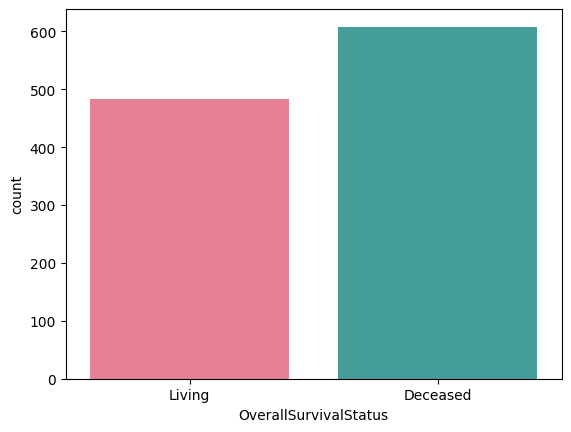

In [11]:
sns.countplot(x=df['OverallSurvivalStatus'],palette='husl')

In [12]:
df['OverallSurvivalStatus']=df['OverallSurvivalStatus'].map({'Living':1,'Deceased':0})
df.head()

,AgeDiagnosis,TypeBreastSurgery,CancerType,CancerTypeDetailed,Cellularity,Chemotherapy,Pam50+Claudin_lowSubtype,Cohort,ERStatusMeasuredIHC,ER_Status,...,OverallSurvivalStatus,PR_Status,RadioTherapy,RelapseFreeStatus(Months),RelapseFreeStatus,Sex,3_GeneClassifierSubtype,TumorSize,TumorStage,PatientVitalStatus
1,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,Positive,...,1,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
4,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,Positive,...,0,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
5,78.77,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,Positive,...,0,Positive,Yes,2.89,Recurred,Female,ER+/HER2- High Prolif,31.0,4.0,Died of Disease
10,86.41,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,Positive,...,0,Negative,Yes,36.09,Not Recurred,Female,ER+/HER2- High Prolif,16.0,2.0,Died of Other Causes
11,84.22,Mastectomy,Breast Cancer,Breast Invasive Lobular Carcinoma,High,No,Her2,1.0,Negative,Positive,...,0,Negative,No,35.79,Recurred,Female,ER+/HER2- High Prolif,28.0,2.0,Died of Disease


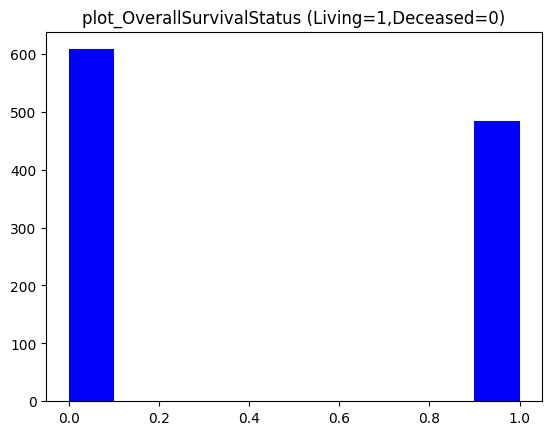

In [13]:
plt.hist(df['OverallSurvivalStatus'],color='b')
plt.title('plot_OverallSurvivalStatus (Living=1,Deceased=0)')
plt.show()

In [14]:
df.isnull().sum()  #we have not non here

AgeDiagnosis                   0
TypeBreastSurgery              0
CancerType                     0
CancerTypeDetailed             0
Cellularity                    0
Chemotherapy                   0
Pam50+Claudin_lowSubtype       0
Cohort                         0
ERStatusMeasuredIHC            0
ER_Status                      0
NeoplasmHistologicGrade        0
HER2_StatusMeasured_SNP6       0
HER2_Status                    0
TumorOtherHistologicSubtype    0
HormoneTherapy                 0
InferredMenopausalState        0
IntegrativeCluster             0
PrimaryTumorLaterality         0
LymphNodesExaminedPositive     0
MutationCount                  0
NottinghamPrognosticIndex      0
OncotreeCode                   0
OverallSurvival(Months)        0
OverallSurvivalStatus          0
PR_Status                      0
RadioTherapy                   0
RelapseFreeStatus(Months)      0
RelapseFreeStatus              0
Sex                            0
3_GeneClassifierSubtype        0
TumorSize 

In [15]:
df.corr()

,AgeDiagnosis,Cohort,NeoplasmHistologicGrade,LymphNodesExaminedPositive,MutationCount,NottinghamPrognosticIndex,OverallSurvival(Months),OverallSurvivalStatus,RelapseFreeStatus(Months),TumorSize,TumorStage
AgeDiagnosis,1.000000,0.031611,-0.096408,0.025244,0.031374,-0.026063,-0.163522,-0.300358,-0.098289,0.064657,0.093958
Cohort,0.031611,1.000000,-0.011275,-0.137843,0.304864,-0.113454,0.193670,-0.194617,0.141868,-0.059629,-0.108987
NeoplasmHistologicGrade,-0.096408,-0.011275,1.000000,0.163060,0.033373,0.715346,-0.110314,-0.080712,-0.082108,0.150270,0.169004
LymphNodesExaminedPositive,0.025244,-0.137843,0.163060,1.000000,-0.076981,0.618333,-0.256570,-0.165401,-0.247280,0.337898,0.461401
MutationCount,0.031374,0.304864,0.033373,-0.076981,1.000000,-0.023981,0.058181,-0.125914,0.036998,0.014816,-0.036172
NottinghamPrognosticIndex,-0.026063,-0.113454,0.715346,0.618333,-0.023981,1.000000,-0.263087,-0.168943,-0.223518,0.350406,0.568924
OverallSurvival(Months),-0.163522,0.193670,-0.110314,-0.256570,0.058181,-0.263087,1.000000,0.423557,0.911252,-0.224893,-0.280228
OverallSurvivalStatus,-0.300358,-0.194617,-0.080712,-0.165401,-0.125914,-0.168943,0.423557,1.000000,0.433857,-0.178829,-0.154812
RelapseFreeStatus(Months),-0.098289,0.141868,-0.082108,-0.247280,0.036998,-0.223518,0.911252,0.433857,1.000000,-0.221950,-0.256515
TumorSize,0.064657,-0.059629,0.150270,0.337898,0.014816,0.350406,-0.224893,-0.178829,-0.221950,1.000000,0.533172


RelapseFreeStatus with OverallSurvival(Months) and NeoplasmHistologicGrade with NottinghamPrognosticIndex have high corralation

<AxesSubplot: >

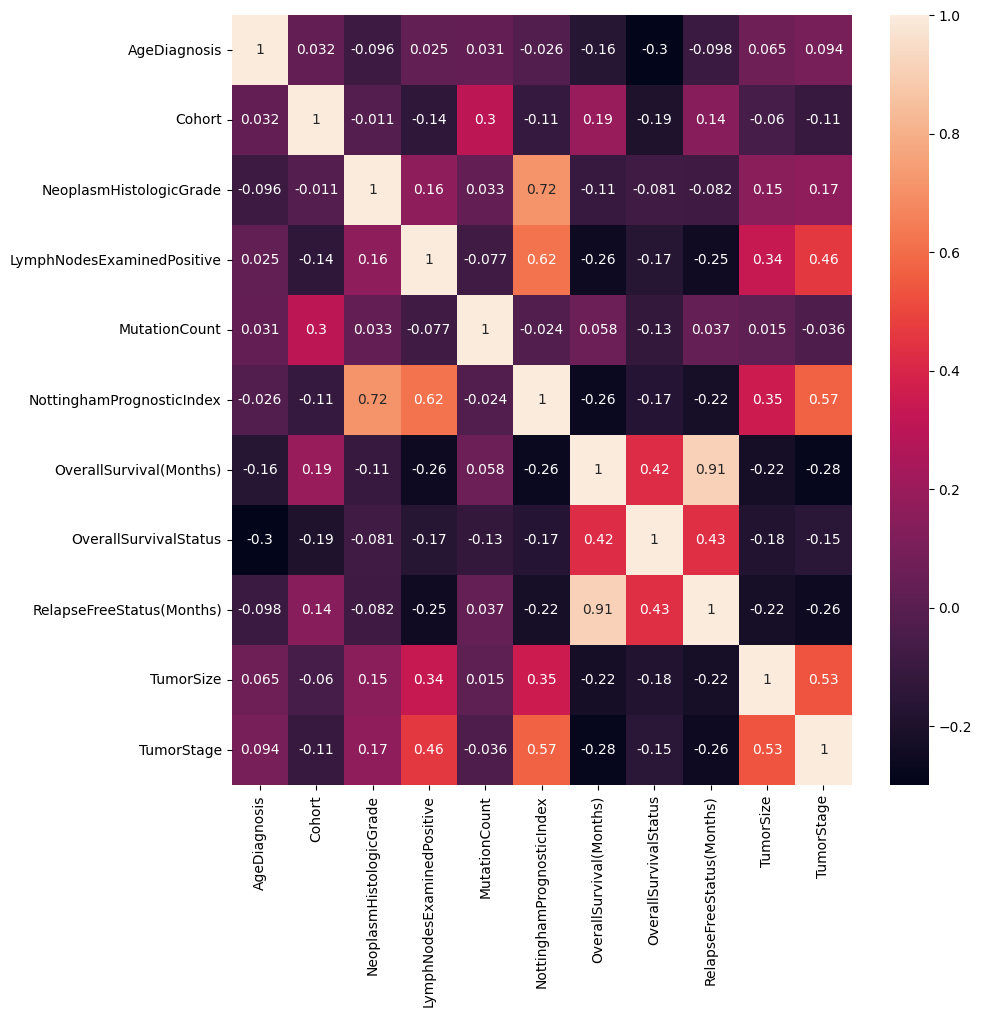

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

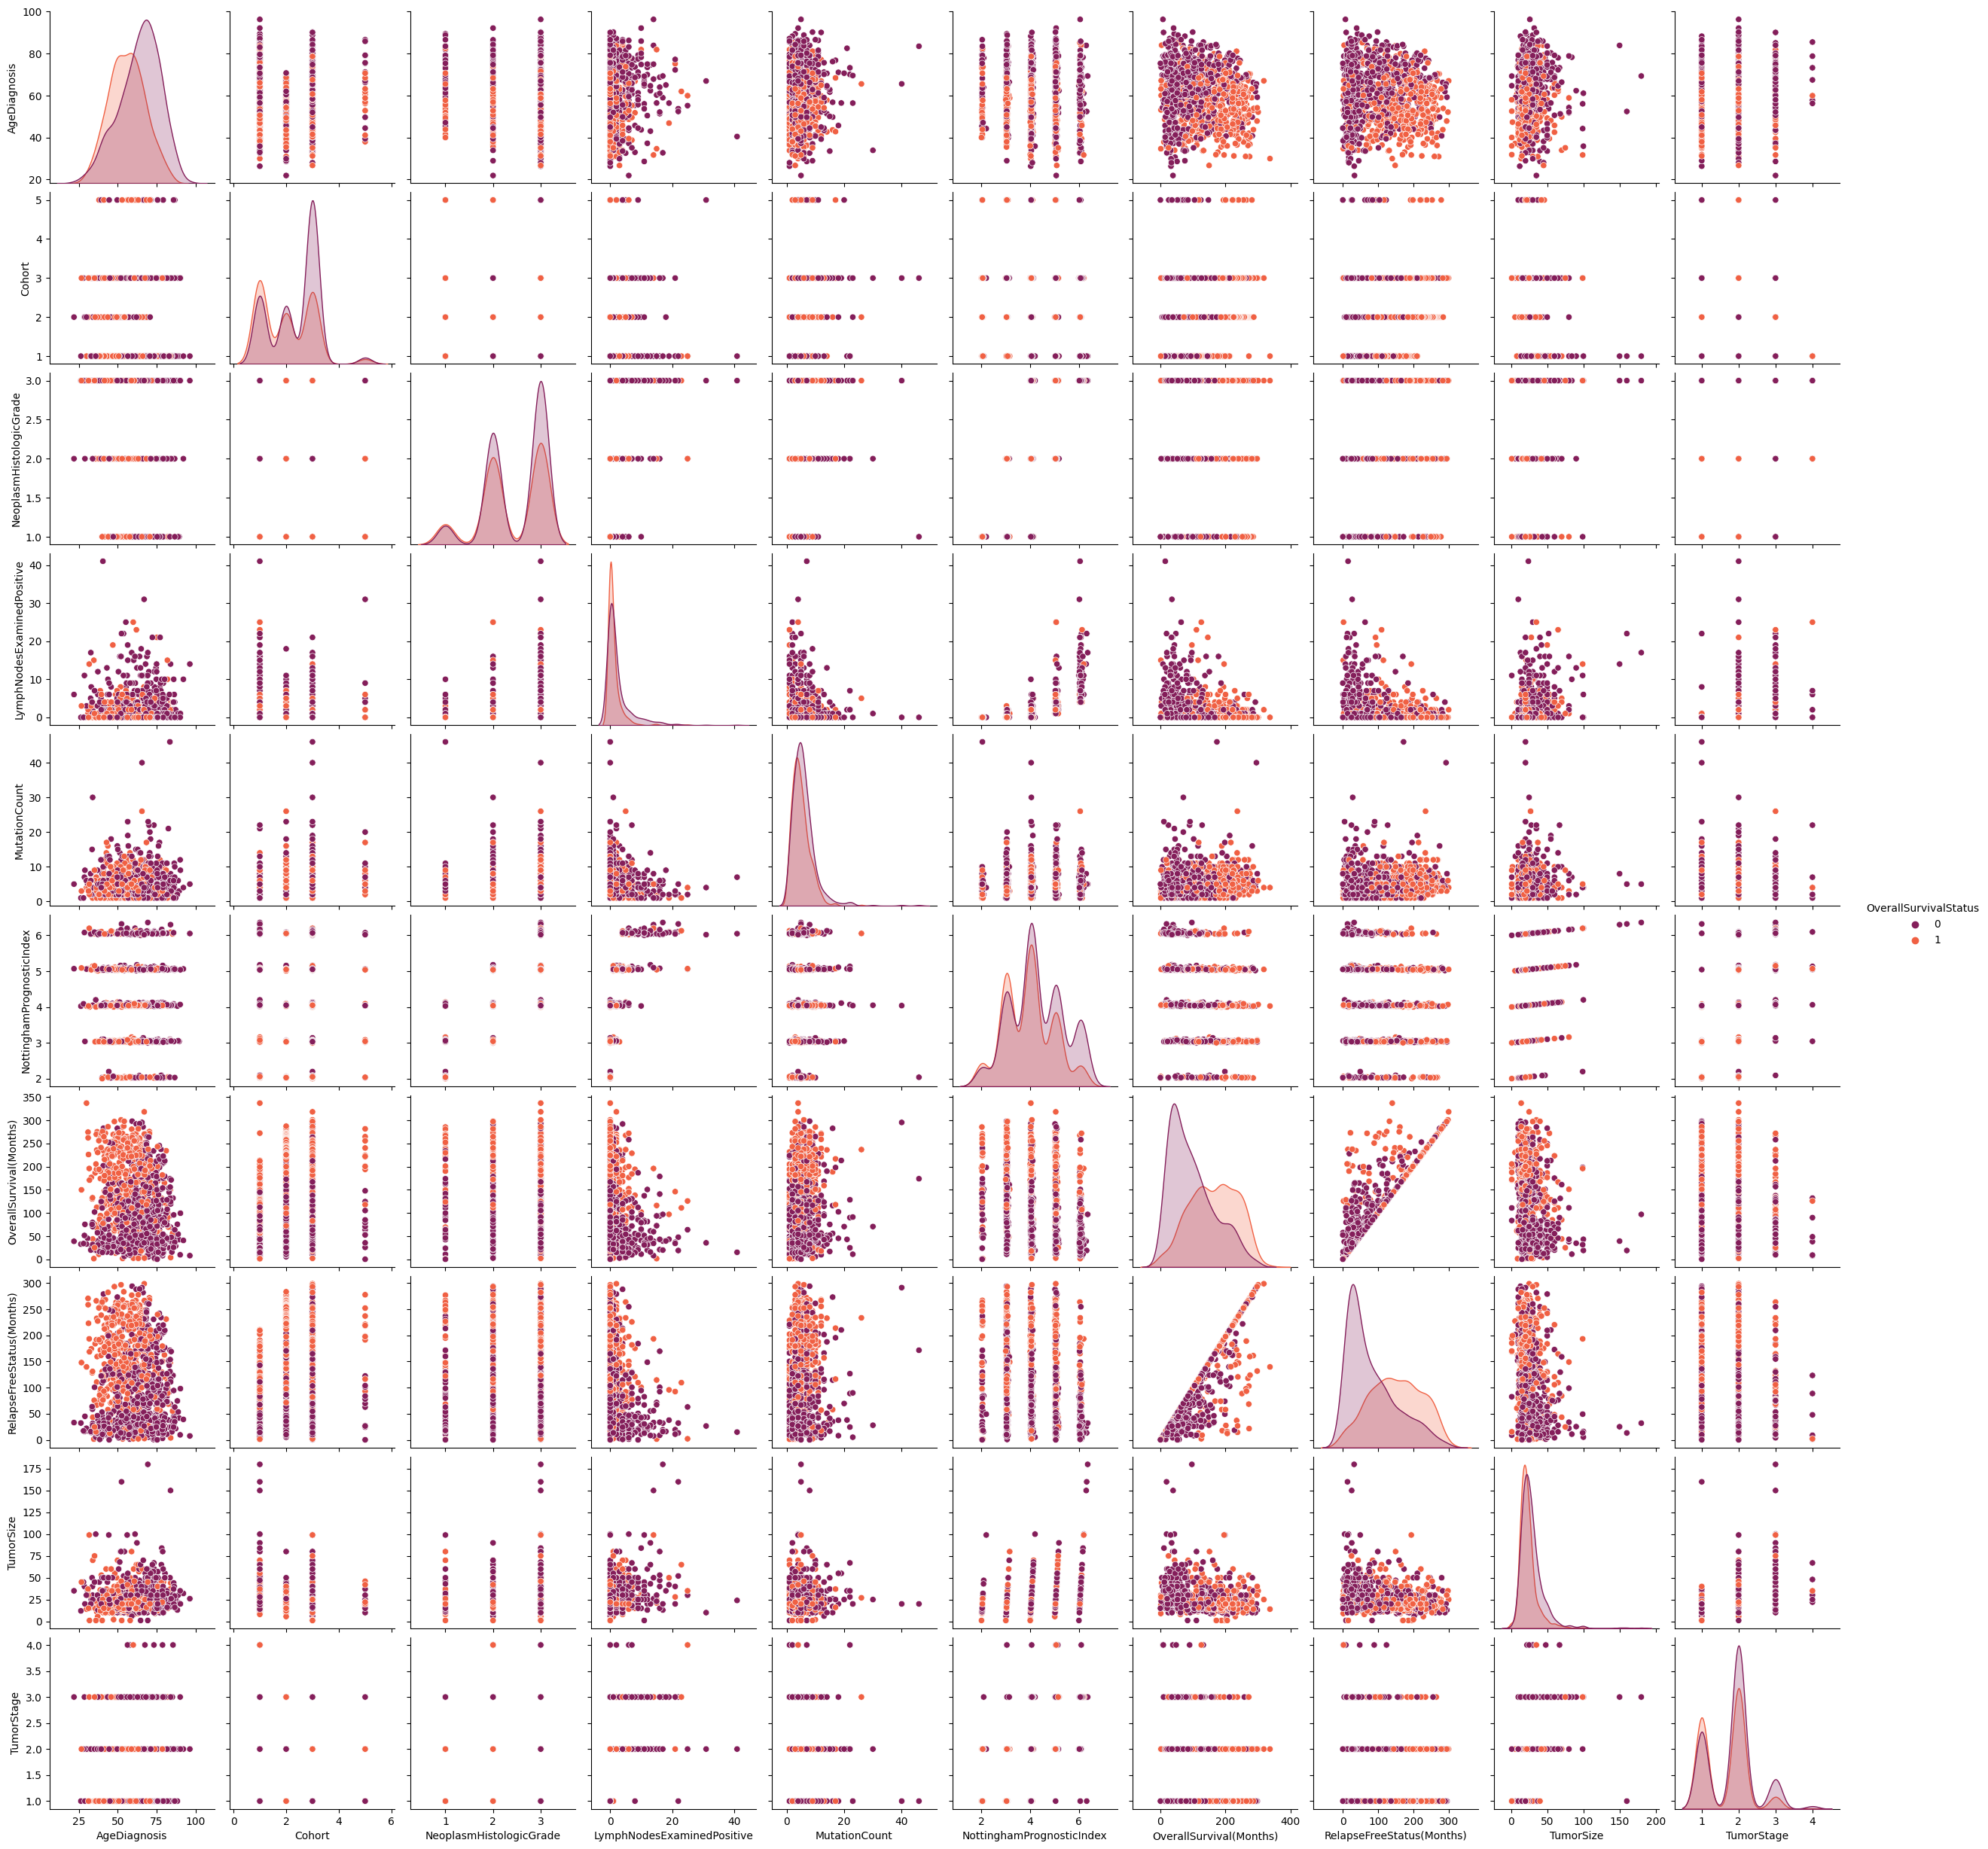

In [17]:
#generate a scatter plot matrix of numeric columns:
cols=['AgeDiagnosis', 'Cohort', 'NeoplasmHistologicGrade', 'LymphNodesExaminedPositive',
       'MutationCount','NottinghamPrognosticIndex','OverallSurvival(Months)',
       'OverallSurvivalStatus','RelapseFreeStatus(Months)','TumorSize','TumorStage']
sns.pairplot(data=df[cols] , hue='OverallSurvivalStatus',palette='rocket')

we should remove highly correlated prediction from the model to fix multicollinearity(they are highly linearly). so as we said above we remove RelapseFreeStatus, OverallSurvival(Months), NeoplasmHistologicGrade, NottinghamPrognosticIndex cloumns.
we also just keep numeric values +  OverallSurvivalStatus  that we map it

In [18]:
df=df[['AgeDiagnosis', 'Cohort',  'LymphNodesExaminedPositive',
       'MutationCount','OverallSurvivalStatus','RelapseFreeStatus(Months)','TumorSize','TumorStage']]
df.columns

Index(['AgeDiagnosis', 'Cohort', 'LymphNodesExaminedPositive', 'MutationCount',
       'OverallSurvivalStatus', 'RelapseFreeStatus(Months)', 'TumorSize',
       'TumorStage'],
      dtype='object')

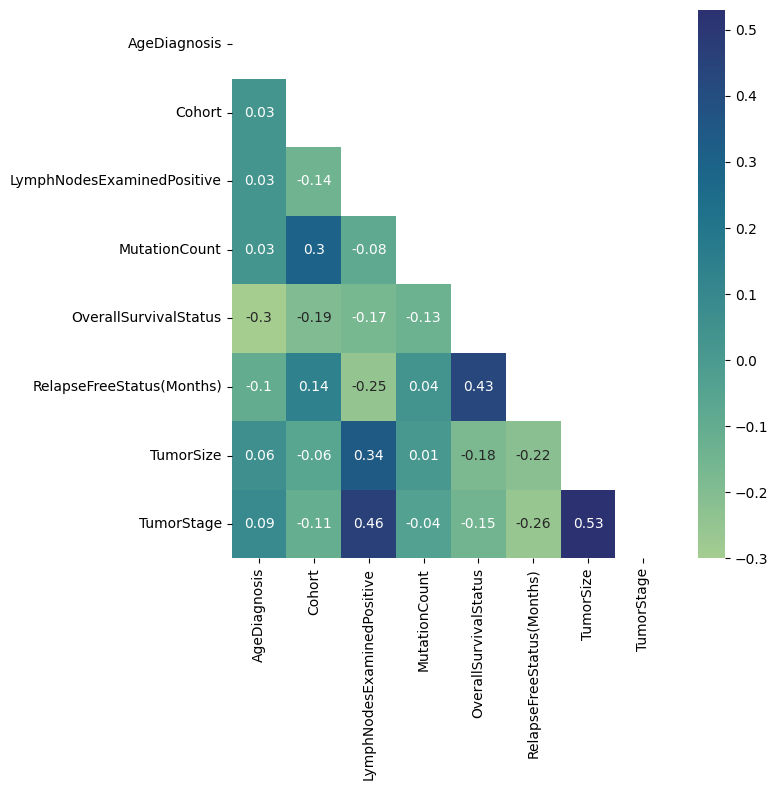

In [19]:
#generate and visualize the correlation matrix
cor=df.corr().round(2)
#Mask for the upper triangle
mask=np.zeros_like(cor,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
#set figure size
f , ax =plt.subplots(figsize=(8,8))
#draw the heatmap
sns.heatmap(cor,mask=mask,cmap="crest",annot=True)
plt.tight_layout()


Preprocessing:

In [20]:
target = df[["OverallSurvivalStatus"]]
features = df[['AgeDiagnosis', 'Cohort',  'LymphNodesExaminedPositive',
       'MutationCount','RelapseFreeStatus(Months)','TumorSize','TumorStage']].dropna()

In [21]:
target.head(2)

,OverallSurvivalStatus
1,1
4,0


In [22]:
features.head(2)

,AgeDiagnosis,Cohort,LymphNodesExaminedPositive,MutationCount,RelapseFreeStatus(Months),TumorSize,TumorStage
1,43.19,1.0,0.0,2.0,83.52,10.0,1.0
4,76.97,1.0,8.0,2.0,18.55,40.0,2.0


In [23]:
le = preprocessing.LabelEncoder()
le.fit(target)
t = le.fit_transform(target)
target_matrix = list(t)
feature_matrix = features.values
print(t)

[1 0 0 ... 0 1 1]


In [24]:
matrix = sklearn.preprocessing.normalize(feature_matrix)
kf = KFold(n_splits=5)
kf.get_n_splits(feature_matrix)

5

In [25]:
for train, test in kf.split(feature_matrix):
    print("train = \n %s\n test = \n %s" % (train, test))
X_train, X_test, y_train, y_test = feature_matrix[train], feature_matrix[test], t[train], t[test]

train = 
 [ 219  220  221  222  223  224  225  226  227  228  229  230  231  232
  233  234  235  236  237  238  239  240  241  242  243  244  245  246
  247  248  249  250  251  252  253  254  255  256  257  258  259  260
  261  262  263  264  265  266  267  268  269  270  271  272  273  274
  275  276  277  278  279  280  281  282  283  284  285  286  287  288
  289  290  291  292  293  294  295  296  297  298  299  300  301  302
  303  304  305  306  307  308  309  310  311  312  313  314  315  316
  317  318  319  320  321  322  323  324  325  326  327  328  329  330
  331  332  333  334  335  336  337  338  339  340  341  342  343  344
  345  346  347  348  349  350  351  352  353  354  355  356  357  358
  359  360  361  362  363  364  365  366  367  368  369  370  371  372
  373  374  375  376  377  378  379  380  381  382  383  384  385  386
  387  388  389  390  391  392  393  394  395  396  397  398  399  400
  401  402  403  404  405  406  407  408  409  410  411  412  413  

Find the best Model :

Logestic Regression :

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
lr=LogisticRegression()
model1=lr.fit(X_train,y_train)
p1=model1.predict(X_test)
print("Score of LogisticRegression : ",lr.score(X_train, y_train))
print("ERROR of LogisticRegression : ", log_loss(p1,y_test))
print("Testing Score of LogisticRegression  : ",lr.score(X_test, y_test))
print("Testing Accuracy of LogisticRegression :" , accuracy_score(y_test,p1))

Score of LogisticRegression :  0.7665903890160183
ERROR of LogisticRegression :  9.030979049408897
Testing Score of LogisticRegression  :  0.7385321100917431
Testing Accuracy of LogisticRegression : 0.7385321100917431


Knn :

In [27]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
p2 = model2.predict(X_test)
print("Score of KNN : ",model2.score(X_train, y_train))
print("ERROR of KNN : ", log_loss(p2,y_test))
print("Testing Score of KNN : ",model2.score(X_test, y_test))
print("Testing Accuracy of LogisticRegression :" , accuracy_score(y_test,p2))

Score of KNN :  0.8249427917620137
ERROR of KNN :  7.921836737963988
Testing Score of KNN :  0.7706422018348624
Testing Accuracy of LogisticRegression : 0.7706422018348624


Naive_bayes :

In [28]:
model3 = GaussianNB()
model3.fit(X_train, y_train)
p3 = model3.predict(X_test)
print("Score of Naive_bayes = ",model3.score(X_train, y_train))
print("ERROR of Naive_bayes = ", log_loss(p3, y_test))
print("Testing Score of Naive_bayes = ",model3.score(X_test, y_test))
print("Testing Accuracy of Naive_bayes :" , accuracy_score(y_test,p3))

Score of Naive_bayes =  0.6853546910755148
ERROR of Naive_bayes =  7.6049488903631985
Testing Score of Naive_bayes =  0.7798165137614679
Testing Accuracy of Naive_bayes : 0.7798165137614679


Desision Tree:

In [29]:
clf = tree.DecisionTreeClassifier()
model4 = clf.fit(X_train, y_train)
p4 = model4.predict(X_test)
print("Score of DesisionTree :  ",model4.score(X_train, y_train))
print("ERROR of DesisionTree : ", log_loss(p4, y_test))
print("Testing Score of DesisionTree : ",model4.score(X_test, y_test))
print("Testing Accuracy of DesisionTree :" , accuracy_score(y_test,p4))

Score of DesisionTree :   1.0
ERROR of DesisionTree :  10.773680651246298
Testing Score of DesisionTree :  0.6880733944954128
Testing Accuracy of DesisionTree : 0.6880733944954128


Random Forest :

In [30]:
rfc=RandomForestClassifier()
model5=rfc.fit(X_train,y_train)
p5=model5.predict(X_test)
print("Score of RandomForest :  ",model5.score(X_train, y_train))
print("ERROR of RandomForest : ", log_loss(p5, y_test))
print("Testing Score of RandomForest : ",model5.score(X_test, y_test))
print("Testing Accuracy of RandomForest :" , accuracy_score(y_test,p5))

Score of RandomForest :   1.0
ERROR of RandomForest :  7.129677638950995
Testing Score of RandomForest :  0.7935779816513762
Testing Accuracy of RandomForest : 0.7935779816513762


In [31]:
print("classification_report of LogisticRegression : \n ",classification_report(y_test,p1))
print("classification_report of KNN : \n ",classification_report(y_test,p2))
print("classification_report of Naive_bayes : \n ",classification_report(y_test,p3))

classification_report of LogisticRegression : 
                precision    recall  f1-score   support

           0       0.71      0.98      0.82       134
           1       0.91      0.36      0.51        84

    accuracy                           0.74       218
   macro avg       0.81      0.67      0.67       218
weighted avg       0.79      0.74      0.70       218

classification_report of KNN : 
                precision    recall  f1-score   support

           0       0.80      0.83      0.82       134
           1       0.71      0.68      0.70        84

    accuracy                           0.77       218
   macro avg       0.76      0.75      0.76       218
weighted avg       0.77      0.77      0.77       218

classification_report of Naive_bayes : 
                precision    recall  f1-score   support

           0       0.83      0.81      0.82       134
           1       0.70      0.74      0.72        84

    accuracy                           0.78       218
   

So we undrestand RandomForest with 78.89 % accuracy is the best Model. 